In [1]:
import numpy as np
import pandas as pd
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import glob

# Reading in files/pretreating data

In [2]:
file_list = []

In [3]:
scan_rates = []

In [4]:
electrode_mass = []

# BioLogic rate performance

In [5]:
def rate_performance(data, scan_rate, electrode_mass):
    '''
    Calculates average capacitance (and error values) for a series of scan rates.
    Returns a plot of average capacitance with error bars versus scan rate.
    '''
    
    charge = []
    charge_error = []
    
    discharge = []
    discharge_error =[]
    
    for file in data:
        
        data = pd.read_table(file)
    
        cycle_number = data['cycle number'].unique()
        potential_window = max(data['Ewe/V']) - min(data['Ewe/V'])

        charge_list = []
        charge_data = data[data['<I>/mA'] > 0]
        for n in cycle_number[1:-1]:
            charge_cap = np.trapz(
                charge_data['<I>/mA'][charge_data['cycle number'] == n], 
                charge_data['time/s'][charge_data['cycle number'] == n])
            charge_list.append(charge_cap)
        charge_cap = np.mean(np.array(charge_list)) / (electrode_mass * potential_window)
        charge.append(charge_cap)
        charge_error.append(np.std(np.array(charge_list)) / (electrode_mass * potential_window))

        discharge_list = []
        discharge_data = data[data['<I>/mA'] < 0]
        for n in cycle_number[1:-1]:
            discharge_cap = np.trapz(
                discharge_data['<I>/mA'][discharge_data['cycle number'] == n], 
                discharge_data['time/s'][discharge_data['cycle number'] == n])
            discharge_list.append(discharge_cap)
        discharge_cap = np.abs(np.mean(np.array(discharge_list)) / (electrode_mass * potential_window))
        discharge.append(discharge_cap)
        discharge_error.append(np.abs(np.std(np.array(discharge_list))) / (electrode_mass * potential_window))
    

    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.errorbar(scan_rate, 
                charge, 
                yerr=charge_error,
                label='Charge',
                marker='o', 
                markersize=12,
                color='red', 
                capsize=5,
                capthick=2
               )
    
    ax.errorbar(scan_rate, 
                discharge,
                yerr=discharge_error,
                label='Discharge',
                marker='o',
                markersize=12,
                color='blue',
                capsize=5,
                capthick=2
               )
    
    
    ax.set_xlabel('Scan rate (mV/s)', fontsize=24)
    ax.set_ylabel('Capacitance (F/g)', fontsize=24)
    ax.tick_params(which='both', labelsize=18, width=2, length=5)
    ax.set_xscale('log')
    ax.set_ylim(0, max(discharge) * 1.1)
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    
    return fig

In [6]:
data2 = pd.read_table('E:echem_test_files/Ti3C2_Fiber_sample_1_1p0M_Na2SO4_2_5_10_20_50_100_200_500_1000_2000_5000_10000_20000_50000_100000_mVs_03_CVA_C06.txt')

In [7]:
file_list = glob.glob('E:echem_test_files/Ti3C2*')

In [8]:
file_list.sort()

In [9]:
file_list[3]

'E:echem_test_files\\Ti3C2_Fiber_sample_1_1p0M_Na2SO4_2_5_10_20_50_100_200_500_1000_2000_5000_10000_20000_50000_100000_mVs_04_CVA_C06.txt'

In [10]:
scan_rates = [2, 5, 10, 20, 50, 100, 200, 500, 1000]

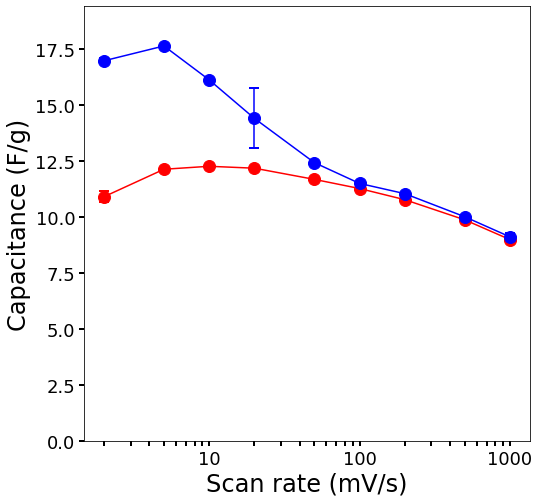

In [11]:
rate_perf = rate_performance(data=file_list, scan_rate=scan_rates, electrode_mass=0.070)